# Custom dense probe (Horvath)


### Setup

Activate `spikinterf` venv

In [22]:
# SETUP PACKAGES
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface as si

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")


# SET PATHS
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"

os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# SETUP PARAMETERS
DURATION = 1.01
CHANNEL_IDS = [30]
SFREQ_VIVO = 30000          # sampling frequency
SFREQ_SILICO = 40000        # sampling frequency
ID_PERIOD_SILI = 51  # 10, 7
ID_PERIOD_VIVO = 0
L5_SITE_SILI = 0
L5_SITE_VIVO = 6

# vivo
data_conf_vivo, param_conf_h_vivo = get_config("vivo_horvath", "probe_2").values() 
PREP_PATH_vivo = data_conf_vivo["preprocessing"]["output"]["trace_file_path"]

# silico
data_conf_sili, param_conf_sili = get_config("silico_horvath", "concatenated/probe_2").values()
PREP_PATH_sili = data_conf_sili["preprocessing"]["output"]["trace_file_path"]

# FIGURE SETTINGS
FIG_SIZE = (0.9, 0.7)
# colors
COLOR_HV = [0.3, 0.3, 0.3]
COLOR_HS = np.array([26, 152, 80]) / 255

# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 0.5 #1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
savefig_cfg = {"transparent":True, "dpi":300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False              # no legend frame

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-07-17 20:20:18,659 - root - utils.py - get_config - INFO - Reading experiment config.
2024-07-17 20:20:18,670 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-07-17 20:20:18,670 - root - utils.py - get_config - INFO - Reading experiment config.


2024-07-17 20:20:18,685 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Get sites in cortex

In [3]:
# load Recording
Recording_sili = si.load_extractor(PREP_PATH_sili)
traces_sili = Recording_sili.get_traces()

# get a site in layer 5
layers_sili = Recording_sili.get_property("layers")

### Parameterize

In [4]:
LAYER = "L5"
YLIM = (-500, 350)

### Model

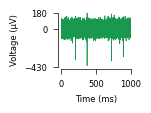

In [23]:
# plot
ID_PERIOD_SILI = 20  # 15  # 31, 18, 50  # 50, 7
L5_SITE_SILI = 10  # 10, 1, 5

# set period
# get trace
L5_site = np.where(layers_sili == LAYER)[0][L5_SITE_SILI]

# plot
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

# calculate one seconde period
one_sec_period = np.arange(
    (ID_PERIOD_SILI - 1) * SFREQ_SILICO, ID_PERIOD_SILI * SFREQ_SILICO, 1
)
ax.plot(traces_sili[one_sec_period, L5_site], color=COLOR_HS)

# legend
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylabel("Voltage (\u03bcV)")
ax.set_xlabel("Time (ms)")
ax.set_xticks([0, SFREQ_SILICO / 2, SFREQ_SILICO], [0, 500, 1000])
ax.set_xlim([0, SFREQ_SILICO])
ax.set_yticks([-430, 0, 180])
ax.set_ylim([-430, 180])

# disconnected
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))

# save
plt.savefig("figures/0_validation/1_components/fig2d_compo_silico_horv.svg")

### In vivo

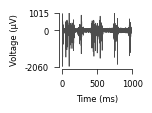

In [28]:
# plot
## to find max
# L5_site_vivo = np.where(layers_vivo == LAYER)[0]
# x = traces_vivo[:, L5_site_vivo]
# ind = np.unravel_index(np.argmax(x, axis=None), x.shape)
L5_SITE = 79  # 24  # 1
SAMPLE_START = 15868410

# get traces
Recording_vivo = si.load_extractor(PREP_PATH_vivo)
traces_vivo = Recording_vivo.get_traces()

# get a site in layer 5
layers_vivo = Recording_vivo.get_property("layers")
L5_site_vivo = np.where(layers_vivo == LAYER)[0][L5_SITE]

# plot
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

# calculate one seconde period
one_sec_period = np.arange(SAMPLE_START, SAMPLE_START + SFREQ_VIVO, 1)
ax.plot(traces_vivo[one_sec_period, L5_site_vivo], color=COLOR_HV)

# legend
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylabel("Voltage (\u03bcV)")
ax.set_xlabel("Time (ms)")
ax.set_xticks([0, SFREQ_VIVO / 2, SFREQ_VIVO], [0, 500, 1000])
ax.set_xlim([0, SFREQ_VIVO])
ax.set_yticks([-2060, 0, 1015], [-2060, 0, 1015])
ax.set_ylim([-2060, 1015])

# disconnected
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))

# save
plt.savefig("figures/0_validation/1_components/fig2e_compo_vivo_horv.svg")